### K-Means Clustering - Unsupervised Machine Learning Prediction
#### About the Dataset
The Iris dataset which we are going to use for this Model is a very popular dataset. The link of the dataset is [Iris Dataset](https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view).
#### Task
Predict the optimum number of clusters and represent it visually using K-Means Clustering. 
#### About Model
K-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.
#### Author - Navjot Singh Bajaj
#### Data Science & Business Analytics Intern at The Spark Foundation
##### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

##### Importing Dataset 

In [2]:
iris_df = pd.read_csv("Iris.csv")
print("The dataset is Imported.")

The dataset is Imported.


In [3]:
iris_df.head() #To print the the first five row

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In this dataset we have 6 columns. In which the Id column and Species column can be dropped. As we have no use of these two columns.

In [4]:
iris_df.shape # To Find the shape of the dataset

(150, 6)

In [5]:
iris_df.isnull().sum() # To obtain the count of null values in the dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris_df.info() # Getting the information of the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris_df.describe() # Describing Dataset using Statistics

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# Here we are going to drop the columns,Id and Species, from the dataset as mentioned above
iris_df.drop(columns=["Id","Species"],axis=1,inplace=True) 
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Model Preparations

##### Elbow Method to Predict the Optimum number of Clusters 
Elbow Method runs K-Means clustering on dataset on number of values for k and then for each values of k computes an average scores for all clusters.

In [9]:
wcss=[] # List for saving the values of Within-Cluster sum of squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(iris_df) #To train the model and create classifier
    wcss.append(kmeans.inertia_) # To obtain the within cluster sum of square
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.93873974358974,
 34.19068792479662,
 29.905374299825105,
 27.927882157034972,
 25.95549708624709]

##### Visualizing 'The elbow' using Line Graph

Text(0.5, 1.0, 'Elbow Method')

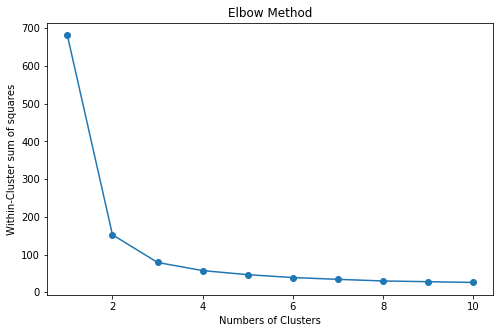

In [10]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,'o-')
plt.xlabel("Numbers of Clusters")
plt.ylabel("Within-Cluster sum of squares")
plt.title("Elbow Method")

##### From the above graph, we can see that the Elbow Point is at 3, So the Optimum Number of clusters is 3.

##### Creating K-Means Classifier

In [11]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(iris_df) # Here we are training, creating Classifier and predicting the Model

In [12]:
y_kmeans # Predicted Clusters for the dataset 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [13]:
kmeans.cluster_centers_ # Centroids of the clusters formed

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

#### Visualisation of Clusters

Text(0.5, 1.0, 'K-Means Clustering')

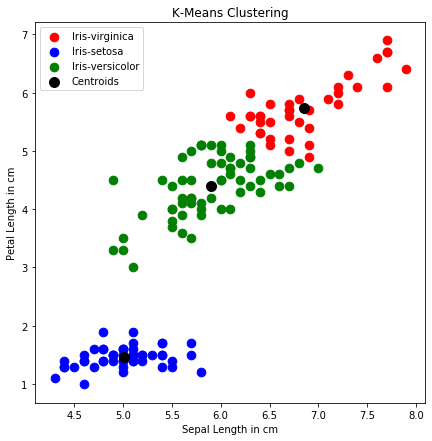

In [17]:
plt.figure(figsize=(7,7))
plt.scatter(iris_df.iloc[y_kmeans==0,0],iris_df.iloc[y_kmeans==0,2],s=75,c='red',label='Iris-virginica')
plt.scatter(iris_df.iloc[y_kmeans==1,0],iris_df.iloc[y_kmeans==1,2],s=75,c='blue',label='Iris-setosa')
plt.scatter(iris_df.iloc[y_kmeans==2,0],iris_df.iloc[y_kmeans==2,2],s=75,c='green',label='Iris-versicolor')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=100,c='black',label='Centroids')
plt.legend()
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.title('K-Means Clustering')

Here we can see three clusters of the Dataset.

### Thank You